<a href="https://colab.research.google.com/github/ryosanada/kuzushiji_1/blob/main/probspace%E7%94%BB%E5%83%8F%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# install,import

In [1]:
#pip install -U albumentations

In [2]:
#pip install --upgrade opencv-python

In [3]:
!pip install -q pytorch_lightning
!pip install -q torchmetrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import albumentations as alb
import cv2
import albumentations.pytorch

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torchvision import datasets
import pytorch_lightning as pl
import torchmetrics
from torchmetrics.functional import accuracy, f1_score
import torchsummary
from torchsummary import summary
from pytorch_lightning.loggers import CSVLogger

from PIL import Image

# データ可視化、確認

In [4]:
test_data = np.load( '/content/drive/MyDrive/Probspace/test_data.npz')
train_data = np.load( '/content/drive/MyDrive/Probspace/train_data.npz')

In [5]:
print(train_data.files)

['arr_0', 'arr_1']


In [6]:
train_imgs = train_data['arr_0']
train_labels = train_data['arr_1']
"""
plt.figure(figsize=(25,25))
plt.subplot(151).imshow(train_imgs[0])
plt.subplot(152).imshow(train_imgs[1])
plt.subplot(153).imshow(train_imgs[2])
plt.subplot(154).imshow(train_imgs[3])
plt.subplot(155).imshow(train_imgs[4])
plt.show()
"""

'\nplt.figure(figsize=(25,25))\nplt.subplot(151).imshow(train_imgs[0])\nplt.subplot(152).imshow(train_imgs[1])\nplt.subplot(153).imshow(train_imgs[2])\nplt.subplot(154).imshow(train_imgs[3])\nplt.subplot(155).imshow(train_imgs[4])\nplt.show()\n'

In [7]:
pd.DataFrame(train_labels).value_counts()

0    3013
1    2201
2     619
3     613
dtype: int64

In [8]:
3013/6446, 2201/6446, 619/6446, 613/6446

(0.46742165684145204,
 0.3414520632950667,
 0.09602854483400558,
 0.09509773502947565)

In [9]:
""" 学習用データのフォルダを作成
import cv2
from PIL import Image
for i in range(len(train_imgs)):
    img = Image.fromarray(train_imgs[i])
    label = train_labels[i]
    if label == 0:
        if i < 10:
            img.save(f'/content/drive/MyDrive/Probspace/train/0/000{i}.png')
        elif i < 100:
            img.save(f'/content/drive/MyDrive/Probspace/train/0/00{i}.png')
        elif i < 1000:
            img.save(f'/content/drive/MyDrive/Probspace/train/0/0{i}.png')
        else:
            img.save(f'/content/drive/MyDrive/Probspace/train/0/{i}.png')

    elif label == 1:
        if i < 10:
            img.save(f'/content/drive/MyDrive/Probspace/train/1/000{i}.png')
        elif i < 100:
            img.save(f'/content/drive/MyDrive/Probspace/train/1/00{i}.png')
        elif i < 1000:
            img.save(f'/content/drive/MyDrive/Probspace/train/1/0{i}.png')
        else:
            img.save(f'/content/drive/MyDrive/Probspace/train/1/{i}.png')

    elif label == 2:
        if i < 10:
            img.save(f'/content/drive/MyDrive/Probspace/train/2/000{i}.png')
        elif i < 100:
            img.save(f'/content/drive/MyDrive/Probspace/train/2/00{i}.png')
        elif i < 1000:
            img.save(f'/content/drive/MyDrive/Probspace/train/2/0{i}.png')
        else:
            img.save(f'/content/drive/MyDrive/Probspace/train/2/{i}.png')

    elif label == 3:
        if i < 10:
            img.save(f'/content/drive/MyDrive/Probspace/train/3/000{i}.png')
        elif i < 100:
            img.save(f'/content/drive/MyDrive/Probspace/train/3/00{i}.png')
        elif i < 1000:
            img.save(f'/content/drive/MyDrive/Probspace/train/3/0{i}.png')
        else:
            img.save(f'/content/drive/MyDrive/Probspace/train/3/{i}.png')
"""

" 学習用データのフォルダを作成\nimport cv2\nfrom PIL import Image\nfor i in range(len(train_imgs)):\n    img = Image.fromarray(train_imgs[i])\n    label = train_labels[i]\n    if label == 0:\n        if i < 10:\n            img.save(f'/content/drive/MyDrive/Probspace/train/0/000{i}.png')\n        elif i < 100:\n            img.save(f'/content/drive/MyDrive/Probspace/train/0/00{i}.png')\n        elif i < 1000:\n            img.save(f'/content/drive/MyDrive/Probspace/train/0/0{i}.png')\n        else:\n            img.save(f'/content/drive/MyDrive/Probspace/train/0/{i}.png')\n\n    elif label == 1:\n        if i < 10:\n            img.save(f'/content/drive/MyDrive/Probspace/train/1/000{i}.png')\n        elif i < 100:\n            img.save(f'/content/drive/MyDrive/Probspace/train/1/00{i}.png')\n        elif i < 1000:\n            img.save(f'/content/drive/MyDrive/Probspace/train/1/0{i}.png')\n        else:\n            img.save(f'/content/drive/MyDrive/Probspace/train/1/{i}.png')\n\n    elif label == 2:

In [10]:
"""　サブミット用データのフォルダを作成
import cv2
from PIL import Image

test_data = np.load( '/content/drive/MyDrive/Probspace/test_data.npz')
test_imgs = test_data['arr_0']

for i in range(len(test_imgs)):
    img = Image.fromarray(test_imgs[i])
    if i < 10:
        img.save(f'/content/drive/MyDrive/Probspace/testdata/test/000{i}.png')
    elif i < 100:
        img.save(f'/content/drive/MyDrive/Probspace/testdata/test/00{i}.png')
    elif i < 1000:
        img.save(f'/content/drive/MyDrive/Probspace/testdata/test/0{i}.png')
    else:
        img.save(f'/content/drive/MyDrive/Probspace/testdata/test/{i}.png')
"""

"\u3000サブミット用データのフォルダを作成\nimport cv2\nfrom PIL import Image\n\ntest_data = np.load( '/content/drive/MyDrive/Probspace/test_data.npz')\ntest_imgs = test_data['arr_0']\n\nfor i in range(len(test_imgs)):\n    img = Image.fromarray(test_imgs[i])\n    if i < 10:\n        img.save(f'/content/drive/MyDrive/Probspace/testdata/test/000{i}.png')\n    elif i < 100:\n        img.save(f'/content/drive/MyDrive/Probspace/testdata/test/00{i}.png')\n    elif i < 1000:\n        img.save(f'/content/drive/MyDrive/Probspace/testdata/test/0{i}.png')\n    else:\n        img.save(f'/content/drive/MyDrive/Probspace/testdata/test/{i}.png')\n"

# 前処理

In [11]:
from torchvision import transforms, datasets

In [12]:
from torchvision.transforms.transforms import CenterCrop
# 前処理(ResNetに合わせる)
transform = transforms.Compose([
                    transforms.Resize(256),
                    transforms.RandomCrop(224),
                    transforms.RandomHorizontalFlip(0.5),
                    transforms.RandomAutocontrast(0.5),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                    
])

In [13]:
# アノテーション
dataset = datasets.ImageFolder('/content/drive/MyDrive/Probspace/train',transform)

In [14]:
#データセット準備

pl.seed_everything(0)

"""
#train val test分割
n_train = 5446
n_val = 1000

train_dataset, val_dataset = torch.utils.data.random_split(dataset, [n_train, n_val], generator=torch.Generator().manual_seed(2013))

"""

# 層化抽出
from sklearn.model_selection import train_test_split
train_indices, val_indices = train_test_split(list(range(len(dataset.targets))), test_size=0.2, stratify=dataset.targets, random_state=2023)
train_dataset = torch.utils.data.Subset(dataset, train_indices)
val_dataset = torch.utils.data.Subset(dataset, val_indices)

#バッチサイズ定義
batch_size = 16

# DataLoaderを作成
train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=1)
val_data_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=1)

Global seed set to 0


# モデル作成、学習

In [15]:
from torchvision.models import resnet18
feature = resnet18(pretrained=True)

In [16]:
#EffcientNet インポート
!pip install efficientnet_pytorch
from efficientnet_pytorch import EfficientNet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
#feature = EfficientNet.from_pretrained('efficientnet-b1', num_classes=4)

In [18]:
#挙動確認(1000出力, 重みの引継ぎありの場合)
h = feature(train_dataset[0][0].unsqueeze(0))
h.shape

torch.Size([1, 1000])

In [41]:
#ネットワークの定義

class Net(pl.LightningModule):

    def __init__(self):
        super().__init__()

        self.feature = feature
        self.fc = nn.Linear(1000,4)

    def forward(self, x):
        h = self.feature(x)
        h = self.fc(h)
        return h

    def training_step (self, batch, batch_idx):
        x, t = batch
        y = self(x)
        weights = torch.tensor([1.0, 1.37,4.87,4.91]).cuda()
        loss = F.cross_entropy(y, t,weight=weights)
        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True)
        self.log('train_acc', accuracy(y.softmax(dim=1), t), on_step=True, on_epoch=True, prog_bar=True)
        tensorboard_logs = {'train_loss': loss}
        return {'loss': loss, 'log': tensorboard_logs}


    def validation_step(self, batch, batch_idx):
        x, t = batch
        y = self(x)
        weights = torch.tensor([1.0, 1.37,4.87,4.91]).cuda()
        loss = F.cross_entropy(y, t,weight=weights)
        self.log('val_loss', loss, on_step=False, on_epoch=True)
        self.log('val_acc', accuracy(y.softmax(dim=1), t), on_step=False, on_epoch=True)
        return {'val_loss': loss}
    
    def validation_end(self, outputs):
        # OPTIONAL
        avg_loss = torch.stack([x['val_loss'] for x in outputs]).mean()
        tensorboard_logs = {'val_loss': avg_loss}
        return {'avg_val_loss': avg_loss, 'log': tensorboard_logs}

    # テスト用データセットに対するイテレーションごとの処理
    def test_step(self, batch, batch_idx):
        x, t = batch
        y = self(x)
        weights = torch.tensor([1.0, 1.37,4.87,4.91]).cuda()
        loss = F.cross_entropy(y, t,weight=weights)

        # 正解率の算出
        y_label = torch.argmax(y, dim=1)
        return y_label

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=0.001)
        return optimizer

In [20]:
import tensorflow as tf
import datetime

In [21]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [22]:
# Clear any logs from previous runs
!rm -rf ./tb_logs/ 

In [23]:
# 学習の実行
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger

pl.seed_everything(0)
net = Net()
logger = TensorBoardLogger("tb_logs", name="my_model")
trainer = Trainer(logger=logger)
trainer = pl.Trainer(max_epochs=50, gpus=1, deterministic=False, logger=logger, callbacks=[EarlyStopping(monitor="val_loss", mode="min",patience=10)])
trainer.fit(net, train_data_loader, val_data_loader)

Global seed set to 0
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/loops/utilities.py:94: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  category=PossibleUserWarning,
GPU available: True, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1817: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  category=PossibleUserWarning,
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs/my_model
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type   | Params
-----------------------------------
0 | feature | ResNet | 11.7 M
1 | fc      | Linear | 4.0 

Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:498: PossibleUserWarning: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test/predict dataloaders.
  category=PossibleUserWarning,
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:245: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  category=PossibleUserWarning,
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:245: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpu

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [24]:
%tensorboard --logdir /content/tb_logs

Reusing TensorBoard on port 6006 (pid 3933), started 2:28:30 ago. (Use '!kill 3933' to kill it.)

<IPython.core.display.Javascript object>

# 学習済みモデル保存＆推論

In [25]:
# テストデータで検証
#results = trainer.test(model=net ,dataloaders = test_loader)

In [26]:
#学習済みモデルの保存
torch.save(net.state_dict(), '/content/drive/MyDrive/Probspace/models/RS0609.pt')

In [27]:
# モデルの型を読み込んで推論モード
net = Net().cpu().eval()

In [28]:
# 重みのロード
net.load_state_dict(torch.load('/content/drive/MyDrive/Probspace/models/RS0609.pt'))#,map_location=torch.device('cpu')))

<All keys matched successfully>

In [29]:
"""
transform = transforms.Compose([
                    transforms.Resize(224),
                    #transforms.CenterCrop(224)256,
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
"""

'\ntransform = transforms.Compose([\n                    transforms.Resize(224),\n                    #transforms.CenterCrop(224)256,\n                    transforms.ToTensor(),\n                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])\n])\n'

In [30]:
# サブミット用データにも同じ前処理
test_pre = datasets.ImageFolder('/content/drive/MyDrive/Probspace/testdata',transform)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<function matplotlib.pyplot.show>

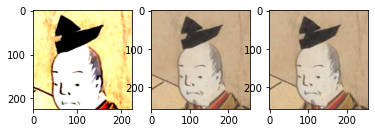

In [31]:
# 前処理したデータ、元ファイル、アノテーションフォルダの画像番号が一致しているか
img = test_pre[1][0].permute(1, 2, 0).numpy()
img3 = Image.open('/content/drive/MyDrive/Probspace/testdata/test/0001.png')
plt.subplot(131).imshow(img)
plt.subplot(132).imshow(test_data['arr_0'][1])
plt.subplot(133).imshow(img3)
plt.show

In [32]:
# 1枚だけ予測してみる
# 予測値の算出
y = net(test_pre[5][0].unsqueeze(0))
# 確率に変換
y = F.softmax(y)
# 予測ラベル
y = torch.argmax(y)
print(int(y))

2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """


In [33]:
from tqdm.notebook import tqdm

In [34]:
pred = []
for i in tqdm(range(len(test_pre))):
   y = net(test_pre[i][0].unsqueeze(0))
   y = F.softmax(y)
   y = torch.argmax(y)
   pred.append(int(y))

  0%|          | 0/2000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  after removing the cwd from sys.path.


In [35]:
# サブミットファイル作成
submit_data = pd.read_csv('/content/drive/MyDrive/Probspace/submission_sample.csv')
submit_data['y'] = pred
submit_data.to_csv('/content/drive/MyDrive/Probspace/sumitdatas/submit_ResNet0609.csv', index=False)

In [36]:
# 予測ラベル確認
pd.DataFrame(submit_data)['y'].value_counts()

0    952
1    602
3    258
2    188
Name: y, dtype: int64

(array([952.,   0.,   0., 602.,   0.,   0., 188.,   0.,   0., 258.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

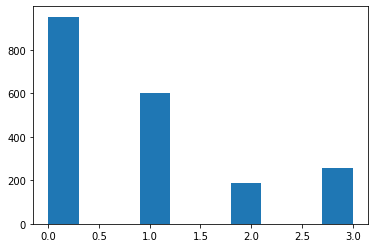

In [37]:
plt.hist(pd.DataFrame(submit_data)['y'])

In [38]:
submit_data[submit_data['y'] == 3]['id']

6          7
13        14
23        24
25        26
42        43
        ... 
1961    1962
1969    1970
1973    1974
1988    1989
1998    1999
Name: id, Length: 258, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


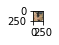

In [39]:
plt.figure(figsize=(1,1))
for i in submit_data[submit_data['y'] == 2]['id']:
    plt.subplot(151).imshow(train_imgs[0])

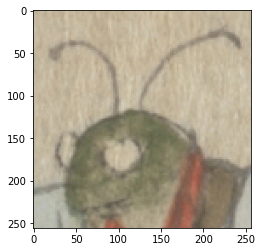

In [40]:
plt.imshow(test_data['arr_0'][1398])